# A calculating case of 1-D diffusion-reaction model

In this studying case, the modeling process involves a basice learning of finite difference model for the transit, 1-D diffusion-reaction equations. The simulated model only contains diffusion and biochemical reaction activities.

The detail of question:  

<img src='Finite difference model of 1D diff-rea.png' width = 400>

The gorvening equation:  
$\frac{dC}{dt}=D\frac{d^{2}C}{dx^{2}}-KC$  

Initial condition: $C(t=0,x)=0$  
Boundary conditions:   
$C(x=0,t)=C_0$   
$\frac{dC}{dx}(x=L)=0$ (No flux on the right side of column)  

The parameters that Questions gave are showing below:

|Parameter|Description|values|
|:-|:----|:-|
|$C_{0}$|Solute influent concentration ($ML^{-3}$)|100 (mg/L)|  
|$K$|$1^{st}$order decay coefficient ($T^{-1}$)|$0.1 (s^{-1})$|  
|$D$|Dispersion coefficient ($L^{2} T^{-1}$)|$0.1 (mm^{2}s^{-1})$|  
|$L$|Length of column ($L$)|1 (mm)|  

The finite difference uses approximations of derivatives at discrete points in a grid of spaces & times. 
The grid seperated by using set $\Delta$t and $\Delta$x. 

Below functions show the fundamental principle of derivation:  
$\frac{dC}{dt}=\frac{C_{i}^{n+1}-C_{i}^{n}}{\Delta t}$  
$\frac{dC}{dx}=\frac{C_{i+1}^{n}-C_{i}^{n}}{\Delta x}$  
$\frac{d^{2}C}{dt^{2}}=\frac{\frac{C_{i+1}^{n}-C_{i}^{n}}{\Delta x}-\frac{C_{i}^{n}-C_{i-1}^{n}}{\Delta x}}{\Delta x}=\frac{C_{i+1}^{n}-2C_{i}^{n}+C_{i-1}^{n}}{(\Delta x)^{2}}$  
Where, n is the time step number, i is the space step number.

Plug those derivation equations into Governing equation, the Governing equation transforms to below function:  
$C_{i}^{n+1}=AC_{i}^{n}+B(C_{i+1}^{n}+C_{i-1}^{n})$  
Where, $A=1-\frac{2D\Delta t}{(\Delta x)^{2}}-\Delta tK$    
$B=\frac{D\Delta t}{(\Delta x)^{2}}$

Below code defines the given values of parameters and imports the used key Python libraries.

In [5]:
import numpy as np
from matplotlib import pyplot as plt, lines

C0=100    #mg/L
x=1      #mm
t=10   #second
D=0.1       # mm^2/s  diffusion coefficient
K=0.1       # s^-1   first order decay rate



Below code is setting the $\Delta x$ and $\Delta t$ values and calculating the time step number(n) and space step number(i)

In [6]:
deltax=0.1
deltat=0.01
xpoint=x/deltax+1
tpoint=t/deltat+1

Below code is the process of the finite difference model. 

First, I created a empty n*i size matrix. During the initial condition $C(t=0,x)=0$, all concentration on x at t=0 will be zero(see marked discription). So I set o loop start with o=1.

Based on the boundary conditions: $C(x=0,t)=C_0$   
$\frac{dC}{dx}(x=L)=0$ (No flux on the right side of column)  
Right boundary: $C_{i}^{n+1}=C_{i-1}^{n+1}$  
Left boundary: $C_{i}^{n+1}=C_0$

In [7]:
A=1-2*D*deltat/deltax**2-deltat*K
B=D*deltat/deltax**2
s=(int(tpoint),int(xpoint))
matrix=np.zeros(s)         #create an empty nXi size matrix
for r in range(int(tpoint)):   #replace all the initial concentration 
    matrix[r][0]=C0            #at x=0 Boundary condition C(x=0,t)=C0
for l in range(int(tpoint)):
    matrix[int(tpoint)-1][int(xpoint)-1]= matrix[int(tpoint)-1][int(xpoint)-2]
    if l < int(tpoint)-1: #The if loop is trying to make sure the loop don't run out   
                          #the index created matrix
        
        matrix[l][int(xpoint)-1]= matrix[l][int(xpoint)-2]  #Boundary condition dC/dx(x=L,t)=0
        for o in range(int(xpoint)):
            o+=1   #initianl condition C(t=0,X)=0
            if o < int(xpoint)-1:                 
                matrix[l+1][o]=A*matrix[l][o]+B*(matrix[l][o+1]+matrix[l][o-1])
            else:
                break        
    else:       
        break

Below code is tthe plotting concentration values of selected different points in time showing the evolution.

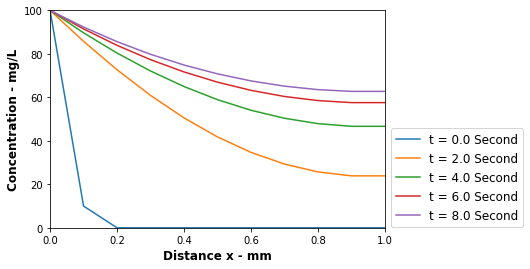

In [8]:
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_xlim(0,x)  #set the limit range of x-axis
ax.set_ylim(0,C0) #set the limit range of y-axis
ax.set_xlabel('Distance x - mm', size = 12, weight = 'bold')
ax.set_ylabel('Concentration - mg/L', size = 12, weight = 'bold')

for time in range(0,t,2):
    
    x1=np.linspace(0,x,int(xpoint))
    ax.plot(x1,matrix[int(time/deltat+1)],label='t = {:.1f} Second'.format(time))
leg=ax.legend(bbox_to_anchor = (1,0.23),loc = 6, fontsize = 12)
plt.show()